<a href="https://colab.research.google.com/github/Abdullahali77/NTI_ML/blob/main/Moneyball_LR_NTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('baseball.csv')

In [7]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [8]:
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [13]:
df.shape

(1232, 15)

In [11]:
df.isna().sum()

,0
Team,0
League,0
Year,0
RS,0
RA,0
W,0
OBP,0
SLG,0
BA,0
Playoffs,0


In [14]:
df.drop(['RankSeason', 'RankPlayoffs', 'OOBP','OSLG'], axis=1, inplace=True)

In [15]:
df.sample()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G
594,DET,AL,1990,750,754,79,0.337,0.409,0.259,0,162


In [18]:
# Create run differential (baseball metric)
df['RD'] = df['RS'] - df['RA']

In [19]:
# One-hot encode League (NL/AL)
df = pd.get_dummies(df, columns=['League'], drop_first=True)

# Drop Team name (too many categories)
df.drop('Team', axis=1, inplace=True)

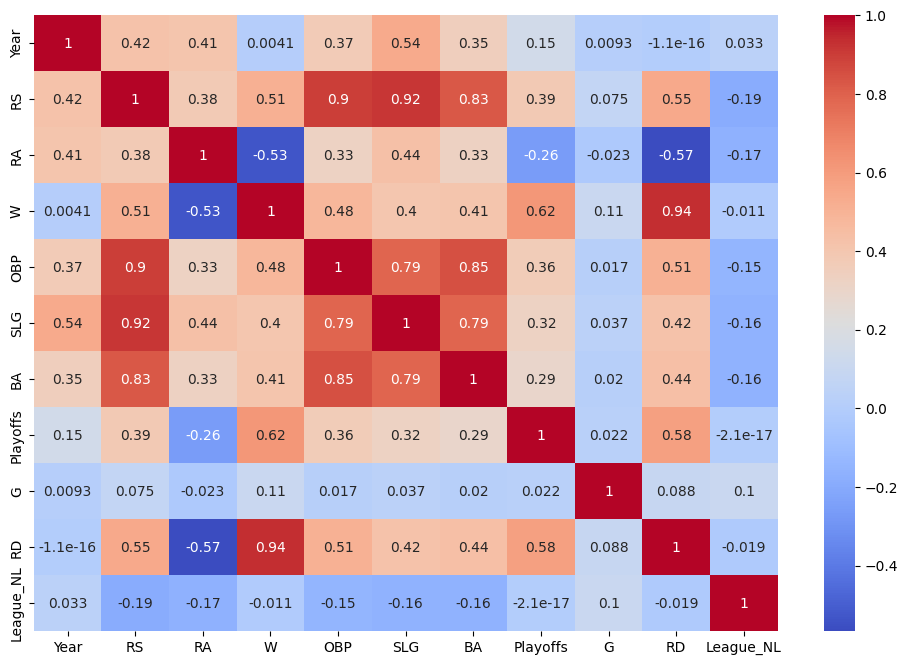

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

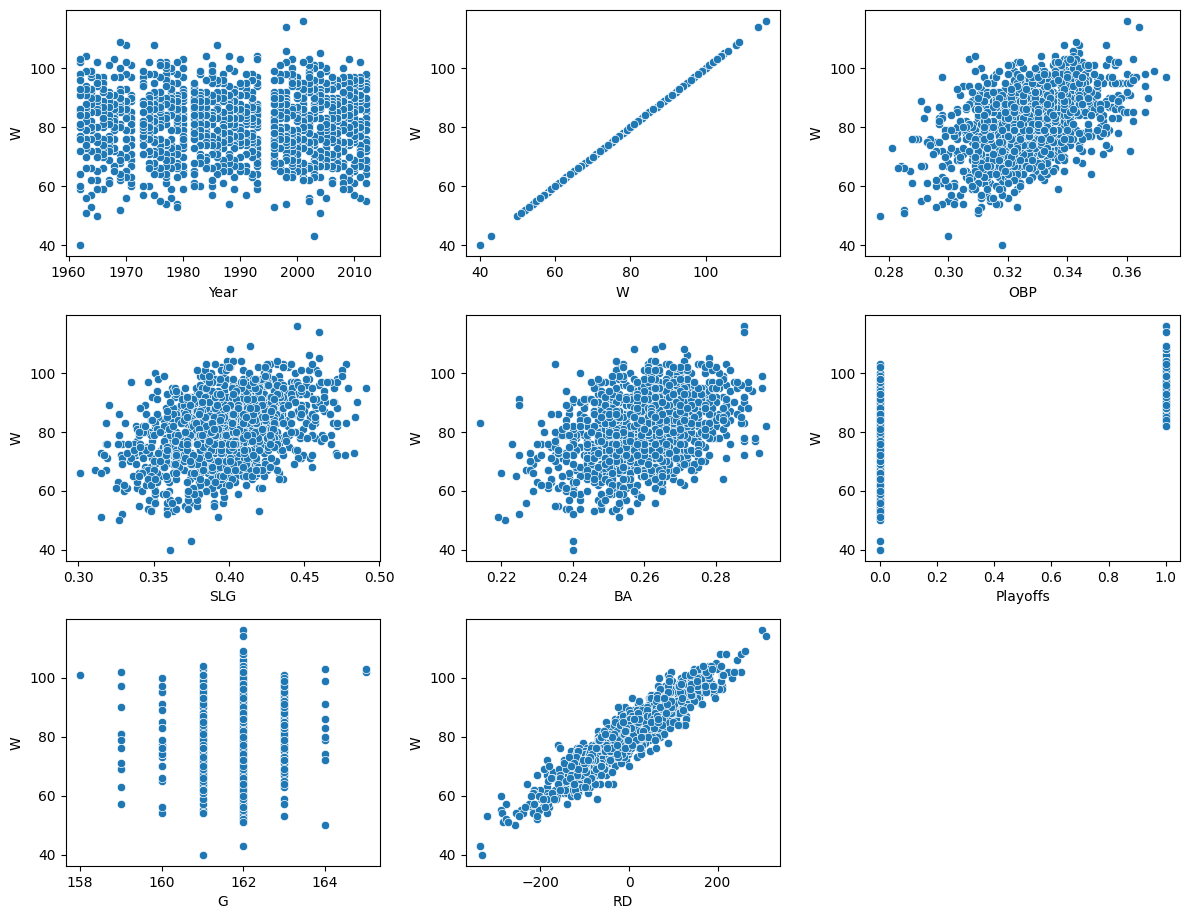

In [56]:
# plot every Feature with W
plt.figure(figsize=(12, 18))
for i, feature in enumerate(df.columns[:-1], 1):
    plt.subplot(6, 3, i)
    sns.scatterplot(x=feature, y='W', data=df)
    plt.xlabel(feature)
    plt.ylabel('W')
plt.tight_layout()
plt.show()

In [22]:
target = 'W'
df.drop(['RS', 'RA'], axis=1, inplace=True)

In [27]:
df.dtypes

,0
Year,int64
W,int64
OBP,float64
SLG,float64
BA,float64
Playoffs,int64
G,int64
RD,int64
League_NL,bool


In [57]:
from sklearn.model_selection import train_test_split

features1 = ['RD','OBP','SLG','BA']
X = df[features1]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(985, 4)
(247, 4)
(985,)
(247,)


In [59]:
X.sample()

,RD,OBP,SLG,BA
221,84,0.322,0.408,0.256


In [60]:
# Visualize LR Line
def plot_lr_line(df, features, target, lr):
    plt.figure(figsize=(15, 5))

    for i, feature in enumerate(features, 1):
        plt.subplot(1, len(features), i)
        plt.scatter(df[feature], df[target], alpha=0.6)

        # Create prediction line (holding other features at mean)
        x_vals = np.linspace(df[feature].min(), df[feature].max(), 100)
        X_pred = np.full((100, len(features)), df[features].mean().values)
        X_pred[:, i-1] = x_vals

        plt.plot(x_vals, lr.predict(X_pred), color='red')
        plt.xlabel(feature)
        plt.ylabel(target)

    plt.tight_layout()
    plt.show()

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [62]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [63]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 16.45157524066587
R-squared: 0.8668920791960558


In [64]:
weights = lr.coef_
features = X.columns
print("Feature Weights:")
for feature, weight in zip(features, weights):
    print(f"{feature}: {weight}")

Feature Weights:
RD: 0.10544472611609598
OBP: 21.643344143573437
SLG: 1.2021940811293312
BA: -27.316744757743855


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


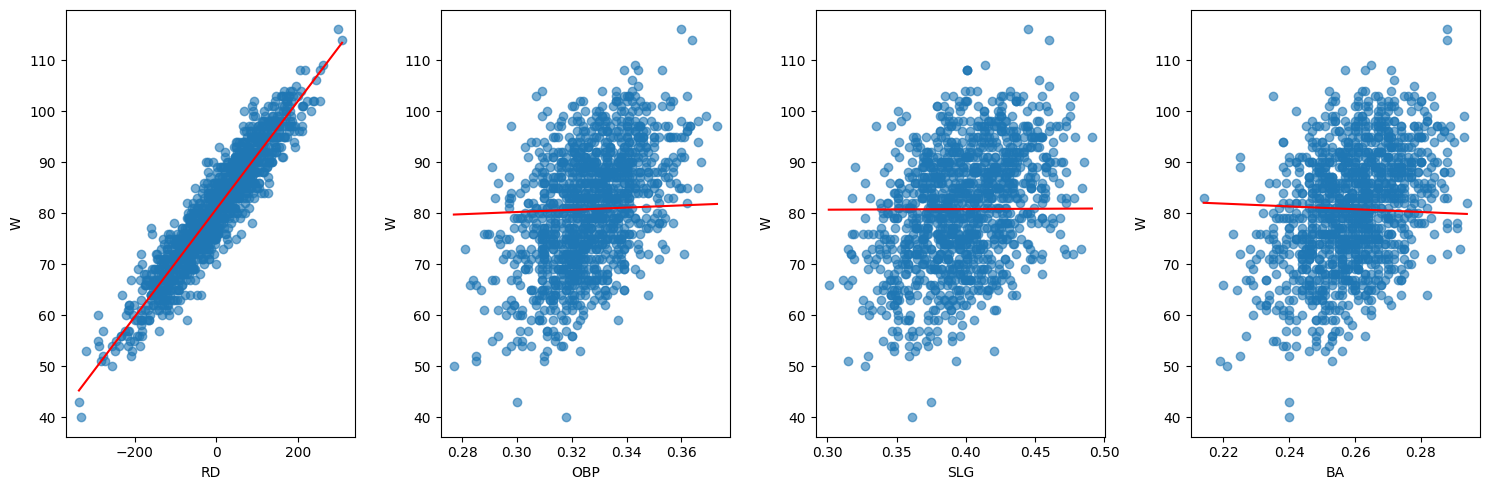

In [65]:
plot_lr_line(df, features1, target, lr)

In [66]:
# Try Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
lr.fit(X_train_scaled, y_train)
y_pred_scaled = lr.predict(X_test_scaled)

In [68]:
mse = mean_squared_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 16.451575240665868
R-squared: 0.8668920791960558


In [69]:
# Try Regulization
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [70]:
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 16.435262747296676
R-squared: 0.867024061820439


In [71]:
# Try all Features
features2 = ['RD','OBP','Playoffs','SLG','BA','League_NL']
X = df[features2]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [72]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [73]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 16.18687243269104
R-squared: 0.8690337610645131


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

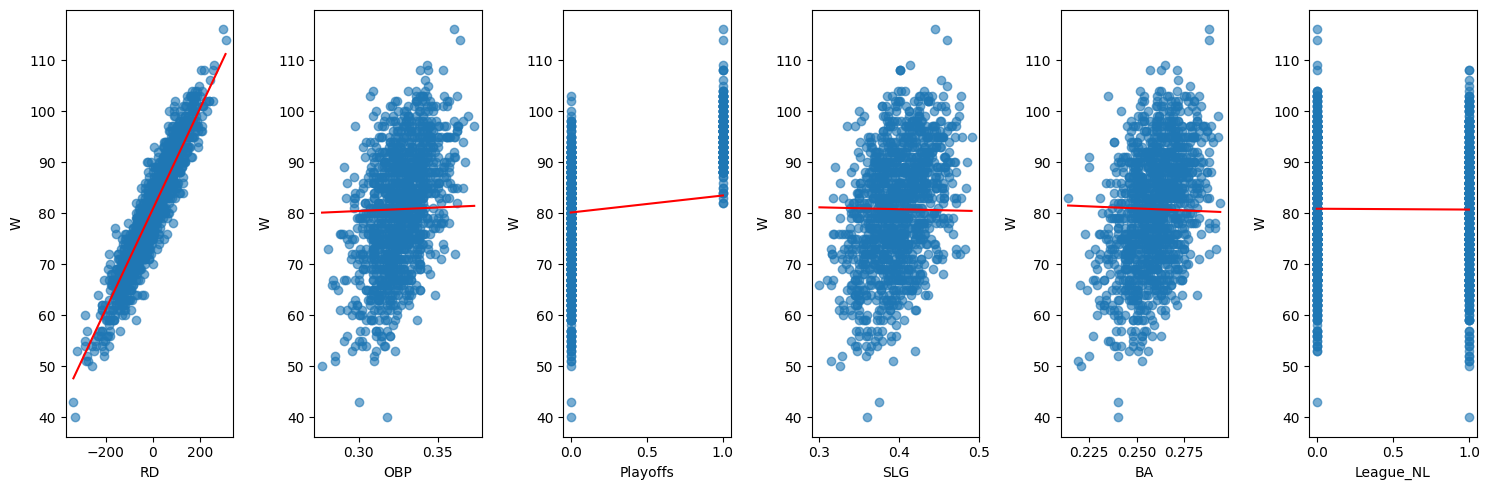

In [74]:
plot_lr_line(df, features2, target, lr)